## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all  the relevant libraries
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

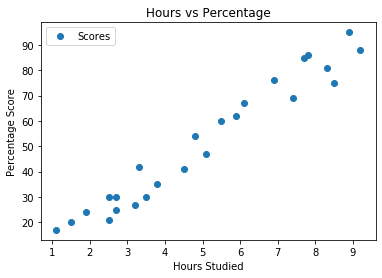

In [3]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [4]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


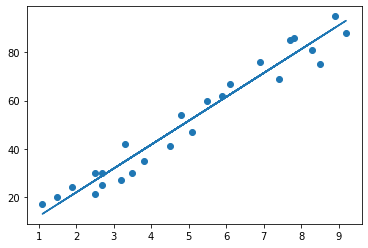

In [7]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

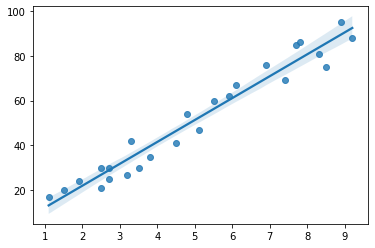

In [8]:
sns.regplot(x = X, y = y) # another way of plotting the regression line

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [9]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted1': y_pred})  
df1 

,Actual,Predicted1
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
regressor.score(X_test,y_test)

0.9454906892105356

In [12]:
regressor.predict([[9.25]])

array([93.69173249])

In [13]:
# You can also test with your own data
hours =[[ 9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


## RIDGE REGRESSION

In [15]:
 from sklearn.linear_model import Ridge

In [16]:
REG = Ridge()

In [25]:
REG.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [26]:
REG.coef_

array([9.83109627])

In [27]:
REG.intercept_

2.4350555519876735

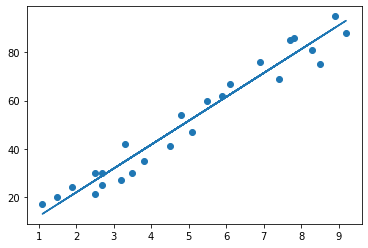

In [18]:
# Plotting the regression line
line1 = REG.coef_*X+REG.intercept_


# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [19]:
Y_pred = REG.predict(X_test)

In [20]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [21]:
REG.score(X_test,y_test)

0.9469535028586777

In [22]:
# Comparing Actual vs Predicted
df2 = pd.DataFrame({'Actual': y_test, 'Predicted2': Y_pred})  
df2 

,Actual,Predicted2
0,20,17.181700
1,27,33.894564
2,69,75.185168
3,30,27.012796
4,62,60.438524


In [23]:
df = pd.merge(df1, df2)
df

,Actual,Predicted1,Predicted2
0,20,16.884145,17.181700
1,27,33.732261,33.894564
2,69,75.357018,75.185168
3,30,26.794801,27.012796
4,62,60.491033,60.438524


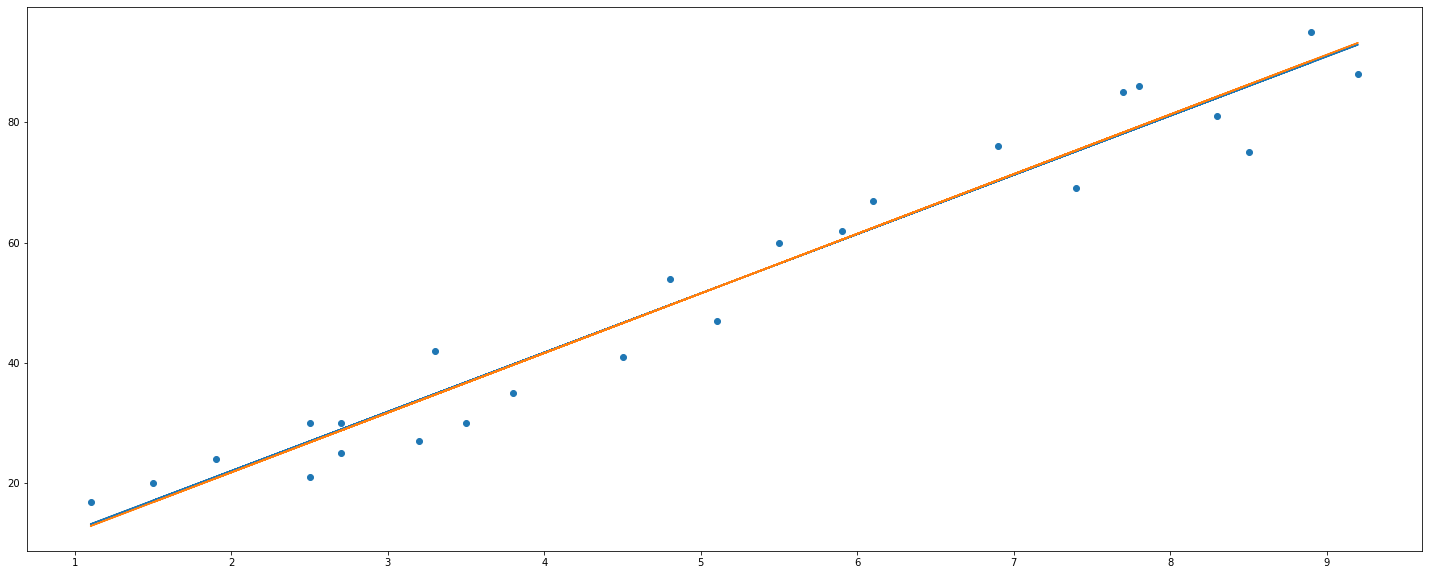

In [24]:
# Plotting the regression line
line1 = REG.coef_*X+REG.intercept_
line2 = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize = (25,10))
plt.scatter(X, y)
plt.plot(X, line1);
plt.plot(X, line2)
plt.show()

## We see that using ridge regression we can improves the accuracy of our model(higher score). Though this is a simple model we can use ridge regression if we have many features and we want to overcome the problem of overfitting.